<h1 align="center" >Malaria Cells Detection<h1>





Dataset - https://www.kaggle.com/code/sharp1/malaria-cells-classification-through-keras/data


<h3> About this Dataset </h3>

<h4>Content: </h4>

The dataset contains 2 folders

* Infected<br>
* Uninfected

And a total of 27,558 images

Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import os 
import cv2
import matplotlib.pyplot as plt 
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras import Sequential,backend,optimizers

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


Identifying Dependent and Independent Objects

In [ ]:
parasitized_path="/content/drive/MyDrive/Colab_Notebooks/cell_images/Parasitized/" 
uninfected_path="/content/drive/MyDrive/Colab_Notebooks/cell_images/Uninfected/"

Reading the data

In [ ]:
parasitized_data = os.listdir(parasitized_path)
uninfected_data = os.listdir(uninfected_path) 

data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread(parasitized_path + img) 
        img_resize = cv2.resize(img_read, (50, 50)) #Resizing the img_read to 50 x 50 
        img_array = img_to_array(img_resize) 
        data.append(img_array) 
        labels.append(1) 
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_path + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0) 
    except:
        None

image_data = np.array(data) #Converting data list into numpy array because numpy array is faster than lists
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 27558
labels: 27558


Data Visualization

Parasitized Sample:



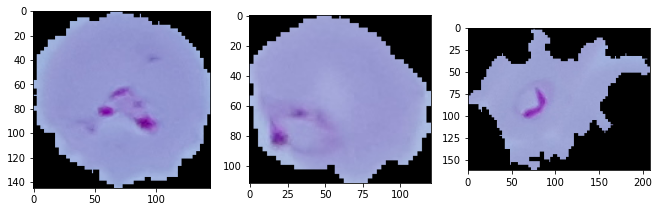

Uninfected Sample:



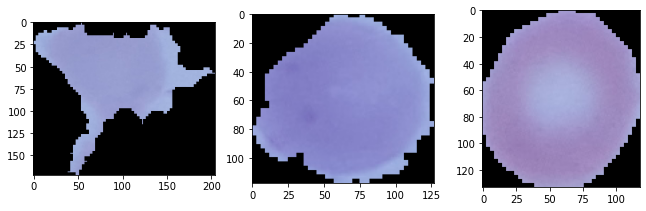

In [ ]:
print("Parasitized Sample:\n")
plt.figure(figsize = (15,15)) #Plotting the figures
for i in range(3): #Displaying the first 3 images which are parasitized
    plt.subplot(4, 4, i+1)
    img = cv2.imread(parasitized_path + parasitized_data[i]) 
    plt.imshow(img)
plt.show()

print("Uninfected Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3): #Displaying the first 3 images which are uninfected
    plt.subplot(4, 4, i+1)
    img = cv2.imread(uninfected_path + uninfected_data[i]) 
    plt.imshow(img)
plt.show()

Dividing into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 0) #Spliting the dataset into 80% training and 20% testing

y_train = np_utils.to_categorical(y_train, num_classes = 2) 
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 22046
X_test: 5512
y_train: 22046
y_test: 5512


Building the CNN model

In [ ]:
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
    
inputShape = (50, 50, 3) #50, 50 is height and width respectively and 3 is the RGB color

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 50, 50)
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = inputShape)) #A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. 
model.add(MaxPooling2D(2,2)) #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input.
model.add(BatchNormalization(axis = -1)) 
model.add(Dropout(0.2)) #20% data is dropped randomly to avoid the problem of overfitting.

model.add(Conv2D(32, (3,3), activation = 'relu')) #filter-32 and kernel-3,3(matrix)
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten()) #Collapses the spatial dimensions of the input into the channel dimension.
  
model.add(Dense(1024, activation = 'relu')) #Dense layer does the operation output = activation(dot(input, kernel) + bias) on the input and returns the output.
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 11, 11, 32)       

Compiling the model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fitting the model

In [ ]:
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
689/689 [==============================] - 84s 119ms/step - loss: 0.5118 - accuracy: 0.7861
Epoch 2/30
689/689 [==============================] - 80s 117ms/step - loss: 0.2143 - accuracy: 0.9197
Epoch 3/30
689/689 [==============================] - 80s 115ms/step - loss: 0.1854 - accuracy: 0.9333
Epoch 4/30
689/689 [==============================] - 81s 117ms/step - loss: 0.1702 - accuracy: 0.9413
Epoch 5/30
689/689 [==============================] - 80s 117ms/step - loss: 0.1653 - accuracy: 0.9436
Epoch 6/30
689/689 [==============================] - 81s 117ms/step - loss: 0.1606 - accuracy: 0.9451
Epoch 7/30
689/689 [==============================] - 81s 118ms/step - loss: 0.1540 - accuracy: 0.9484
Epoch 8/30
689/689 [==============================] - 82s 119ms/step - loss: 0.1555 - accuracy: 0.9489
Epoch 9/30
689/689 [==============================] - 82s 119ms/step - loss: 0.1461 - accuracy: 0.9509
Epoch 10/30
689/689 [==============================] - 83s 120ms/step - l

Evaluating the model

In [ ]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 6s 32ms/step - loss: 0.1084 - accuracy: 0.9659
Loss:  0.10838842391967773
Accuracy:  96.58926129341125
